In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import binom
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
def qq_plot(np_dist, dist='norm'):
    np_dist = np.sort(np_dist)
    if(len(np_dist))>=100:
        x = np.linspace(0,1,100)
        quant = np.linspace(0,len(np_dist)-1,100,dtype=int)
        plt.figure(figsize=(10,10))
        np_quant = np.zeros(len(quant))
        for i in range(len(quant)):
            np_quant[i]=np_dist[quant[i]]
    else:
        n=len(np_dist)
        x = np.linspace(0,1,n)
        quant = np.zeros(n)
        np_quant = np.zeros(n)
        np_quant = np_dist
        for i in range(n):
            quant[i] = int(100*(i+0.5)/n)
        print("percentiles ---",quant)
    if dist =='binom':
        checker = st.binom.ppf(x, 10, 0.3)
    else:
        checker = st.norm.ppf(x, loc = 0, scale = 1)
    m, b = np.polyfit(checker[1:-2], np_quant[1:-2], 1) #m = slope, b=intercept
    plt.plot(checker[1:-2], m*checker[1:-2] + b, color='pink')
#     plt.plot(x,quant/100 , 'bo') #this is for the case when our sample size is smaller then 100
#                                   # and we can compare our percentiles with real 
#                                   #percentiles (the plot is a straight line :) ) 
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.plot(checker,np_quant,'bo')

In [3]:
s = np.random.normal(10, 7, 15)

percentiles --- [ 3. 10. 16. 23. 30. 36. 43. 50. 56. 63. 70. 76. 83. 90. 96.]


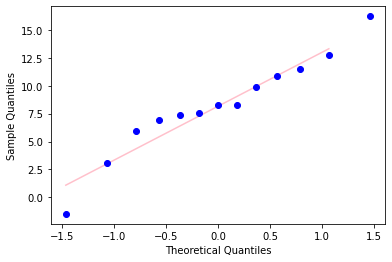

In [4]:
qq_plot(s)

In [5]:
g = np.random.normal(10, 7, 1500)

## Now let's compare

### for normal distribution

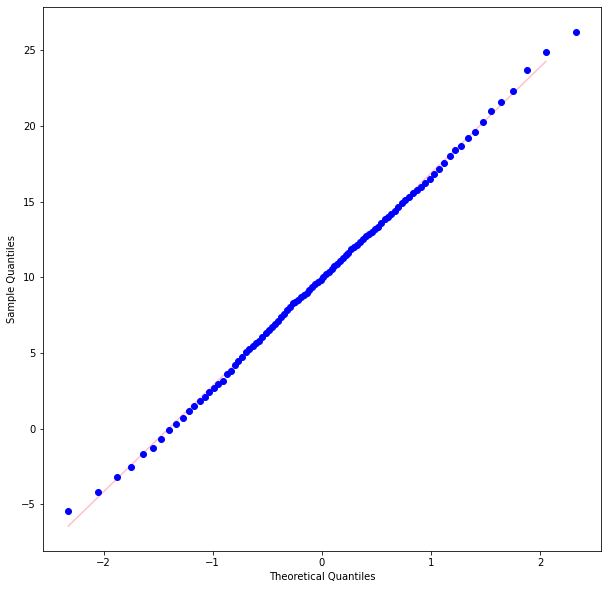

In [6]:
qq_plot(g)

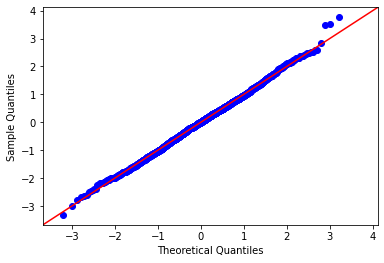

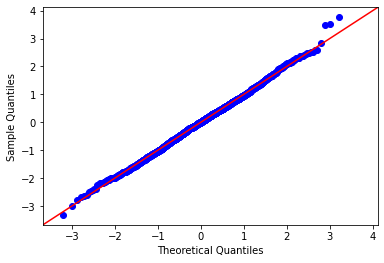

In [7]:
sm.qqplot(g,line='45',fit=True,dist=st.norm)

### Binomial distribution

In [8]:
bin = np.random.binomial(9, 0.5, 1000)

In [9]:
#qq_plot(bin,dist='binom')

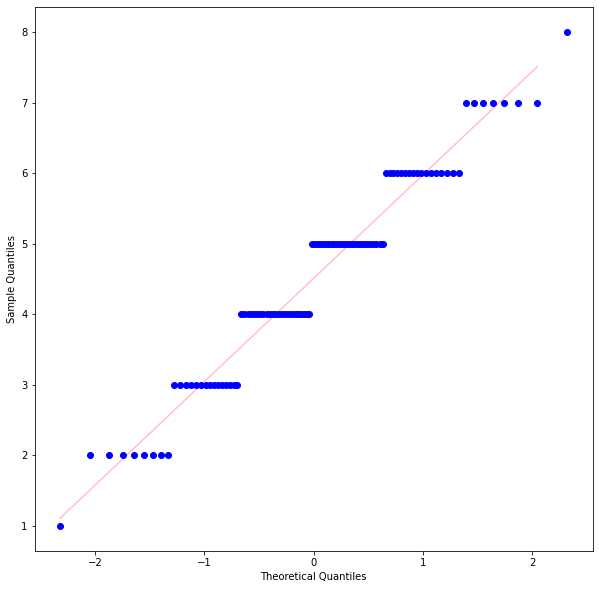

In [10]:
qq_plot(bin)

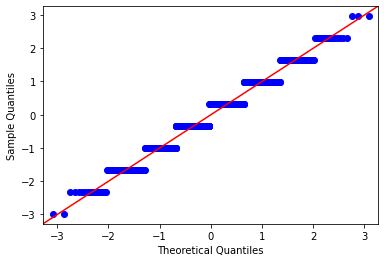

In [11]:
sm.qqplot(bin,line='45',fit=True,dist=st.norm)
plt.show()

### Uniform distribution

In [12]:
uni  = np.random.uniform(low=10, high=1000, size=1000)

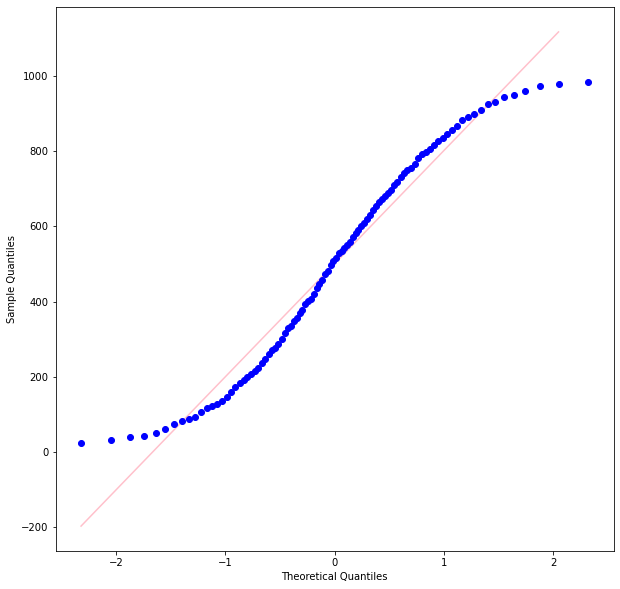

In [13]:
qq_plot(uni)

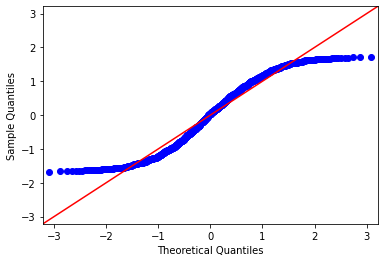

In [14]:
sm.qqplot(uni,line='45',fit=True,dist=st.norm)
plt.show()

### Right/left skewed distribution

In [15]:
from scipy.stats import skewnorm
skewness = -5
sk_left = skewnorm.rvs(a = skewness,loc=1000, size=50000)  
sk_left = sk_left - min(sk_left)      
sk_left = sk_left / max(sk_left)      
sk_left = sk_left * 50000  

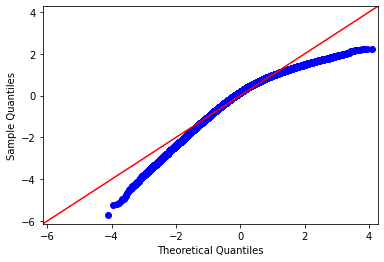

In [16]:
sm.qqplot(sk_left,fit=True,line='45') 
plt.show()

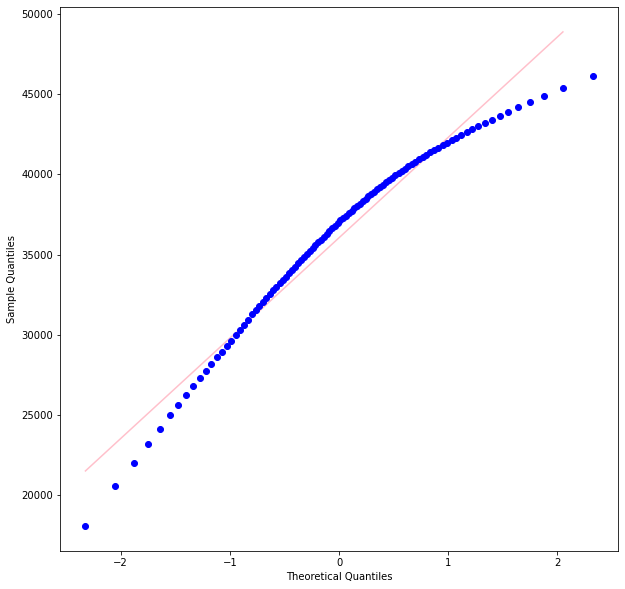

In [17]:
qq_plot(sk_left)

In [18]:
skewness = 5
sk_right = skewnorm.rvs(a = skewness,loc=1000, size=50000)  
sk_right = sk_right - min(sk_right)      
sk_right = sk_right / max(sk_right)      
sk_right = sk_right * 50000  

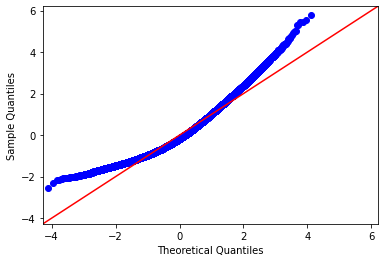

In [19]:
sm.qqplot(sk_right,fit=True,line='45') 
plt.show()

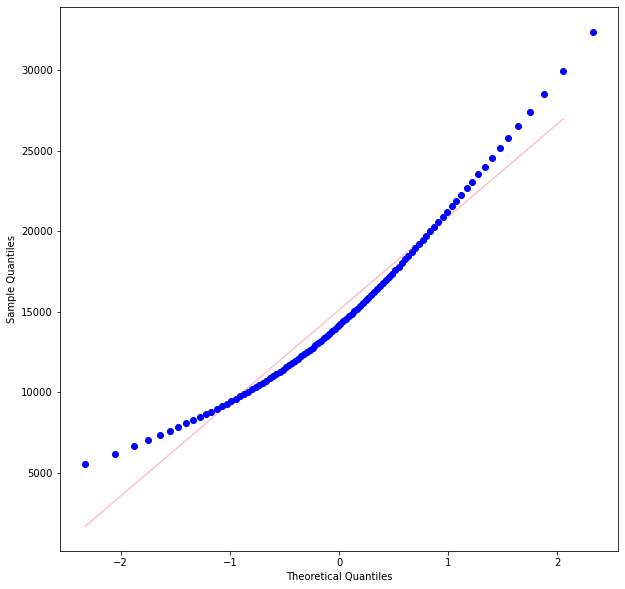

In [20]:
qq_plot(sk_right) 